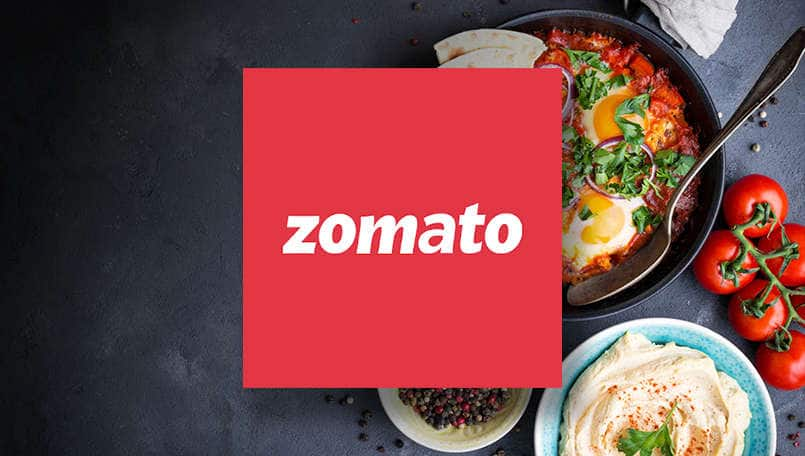

>  CONTEXT:- 

> I was always fascinated by the food culture of Bengaluru. Restaurants from all over the world can be found here in Bengaluru. From United States to Japan, Russia to Antarctica, you get all type of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts you name it and Bengaluru has it. Bengaluru is best place for foodies. The number of restaurant are increasing day by day. Currently which stands at approximately 12,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food. The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place.

AIM:-

To help new restaurants in deciding their theme, cuisine, cost etc for a particular location.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
df = pd.read_csv("../input/zomato-bangalore-restaurants/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [4]:
df.shape

(51717, 17)

In [5]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
#% of missing values
df.isnull().sum()/len(df)*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [7]:
#Changing the Columns Names
df.columns
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city', 'rate':'rating'})
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rating',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'cost', 'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [8]:
#Some Transformations
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           51717 non-null  object 
 1   address       51717 non-null  object 
 2   name          51717 non-null  object 
 3   online_order  51717 non-null  object 
 4   book_table    51717 non-null  object 
 5   rating        43942 non-null  object 
 6   votes         51717 non-null  int64  
 7   phone         50509 non-null  object 
 8   location      51696 non-null  object 
 9   rest_type     51490 non-null  object 
 10  dish_liked    23639 non-null  object 
 11  cuisines      51672 non-null  object 
 12  cost          51371 non-null  float64
 13  reviews_list  51717 non-null  object 
 14  menu_item     51717 non-null  object 
 15  type          51717 non-null  object 
 16  city          51717 non-null  object 
dtypes: float64(1), int64(1), object(15)
memory usage: 6.7+ MB


In [9]:
#Removing '/5' from Rates
df['rating'].unique()
df = df.loc[df.rating !='NEW']
df = df.loc[df.rating !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rating = df.rating.apply(remove_slash).str.strip().astype('float')
df['rating'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

**VISUALISATION :-**

WHich are the top chain restaurants in Bangaluru ??

Text(0.5, 0, 'Number of outlets')

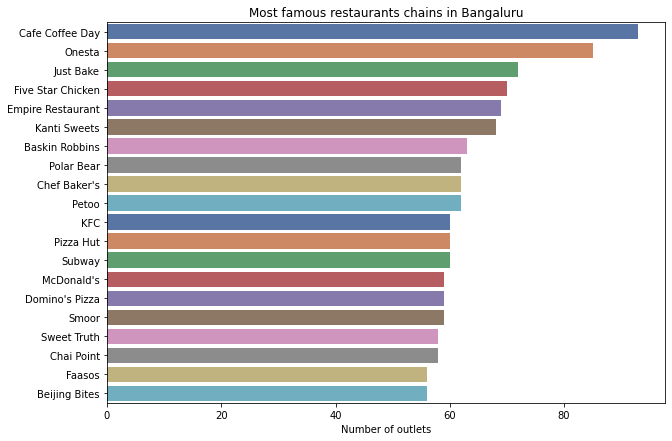

In [10]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

Top 10 most popular restaurant types

Text(0.5, 0, 'count')

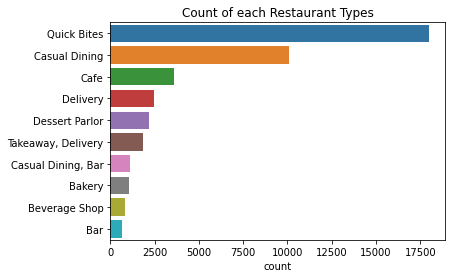

In [11]:
from collections import Counter
r_type=df['rest_type'].value_counts()[:10]
sns.barplot(x=r_type,y=r_type.index)
plt.title("Count of each Restaurant Types")
plt.xlabel("count")

Text(0.5, 0, 'count')

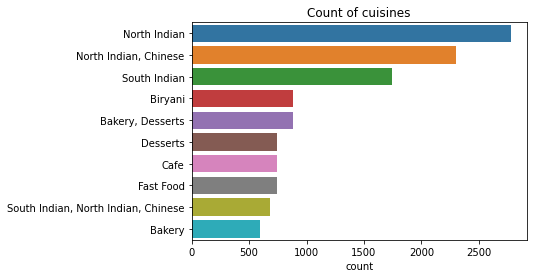

In [12]:
from collections import Counter
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines,y=cuisines.index)
plt.title("Count of cuisines")
plt.xlabel("count")

Text(0.5, 0, 'count')

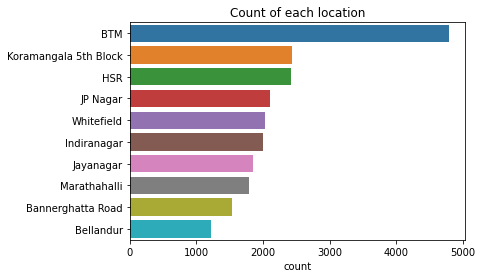

In [13]:
from collections import Counter
location=df['location'].value_counts()[:10]
sns.barplot(x=location,y=location.index)
plt.title("Count of each location")
plt.xlabel("count")

In [14]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, 9 ...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore              [FreshMenu, Fit Dish Fetish, The B2B Cart]
Whitefield           [Imperio Cafe, Night Diaries, AB's - Absolute ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Red Chillies Curries ...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 93, dtype: object

**Number of restaurants at different locations in bengalore :-**

In [15]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [16]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,336
Jayanagar,344
Bannerghatta Road,424
JP Nagar,484
Indiranagar,501
Electronic City,616
Marathahalli,632
HSR,650
BTM,672


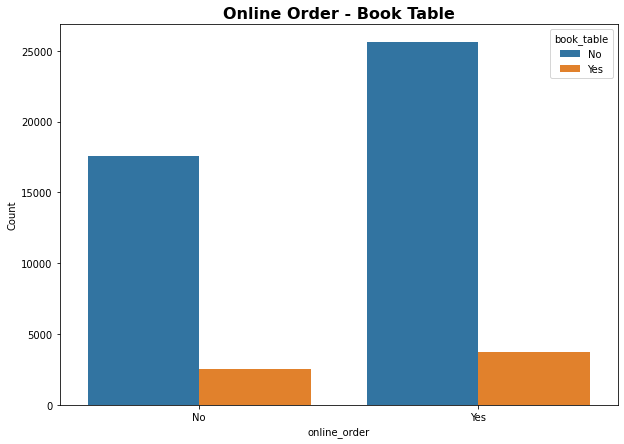

In [17]:
df_online_booking = df.groupby(["online_order", "book_table"]).size().reset_index(name = "Count")
plt.figure(figsize = (10,7))
sns.barplot(x="online_order", y="Count", hue="book_table", data=df_online_booking)
plt.title("Online Order - Book Table", fontsize=16, fontweight='bold')
plt.show()

Observation: We observe that maximum restaurants provide online ordering but not table booking facility. The number of restaurants providing table booking facility but not online order is the least.
More than 15000 restaurants don't provide online ordering as well as table booking facility.

So in case we are planning to start a restaurant and we want some facility to have a lower priority then we can think about this one

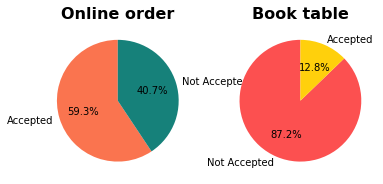

In [18]:
label1 = ["Accepted",'Not Accepted']
label2 = ['Not Accepted', "Accepted"]

df_online = df['online_order'].value_counts().values
df_table = df['book_table'].value_counts().values

fig, ax1 = plt.subplots(nrows=1, ncols=2)

color1 = ['#FA744F', '#16817A']
color2 = ['#FC5050', '#FFD00C']

ax1[0].pie(df_online, labels=label1, autopct='%1.1f%%', startangle=90, colors=color1)
ax1[0].set_title('Online order', fontsize=16, fontweight='bold')

ax1[1].pie(df_table, labels=label2, autopct='%1.1f%%', startangle=90, colors=color2)
ax1[1].set_title('Book table', fontsize=16, fontweight='bold')
plt.show()

Observation: 59.2% of the restaurants accept online order and 40.8% don't. Only 12.6% of the restaurants provide table booking facility whereas 87.4% don't.

**Is cost affected by online order and table bookings ??**

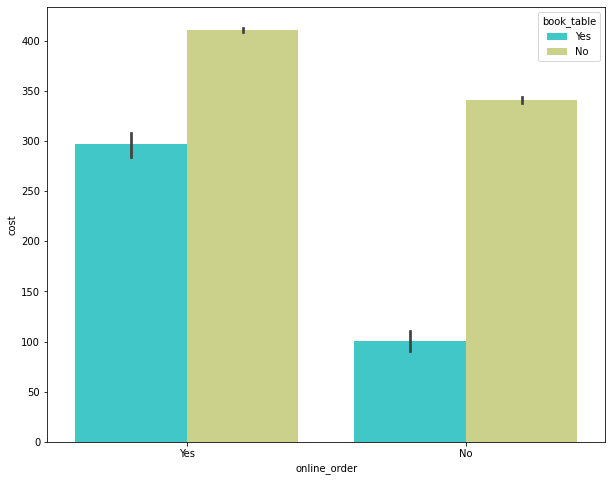

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='online_order', y='cost', hue='book_table', palette='rainbow')
plt.show()

Observation: Restaurants which don't accept online orders but provide table booking have the highest approx_cost value above Rs 1500, whereas restaurants which accept online orders and provide table booking have an approx_cost near Rs 1000. Restaurants which don't provide table booking have an approx_cost of Rs 400.

**what kind of distribution does rate follow ?**

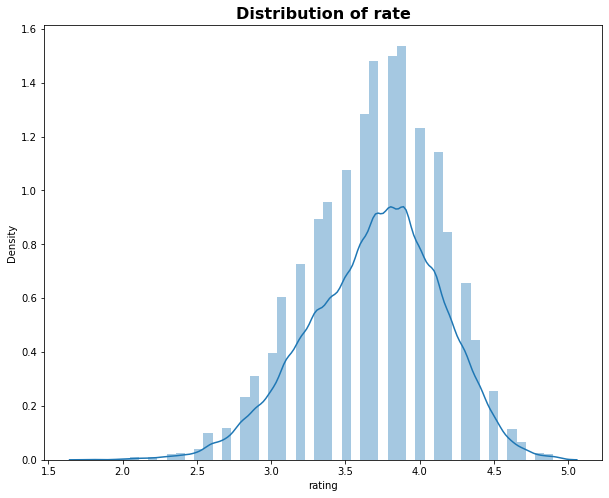

In [20]:
# Density plot to visualize rate

plt.figure(figsize = (10, 8))
sns.distplot(df['rating'])
plt.title("Distribution of rate", fontsize=16, fontweight='bold')
plt.show()

Observation: More than 50 percent of restaurants have rating between 3 and 4. Restaurants having rating more than 4.5 and less than 2.5 are very rare.

In [21]:
df["cost"]

0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
49435      1.5
49436    600.0
49437      2.0
49438      2.5
49439      1.5
Name: cost, Length: 49440, dtype: float64

**Do cost differ with a change in location ??**

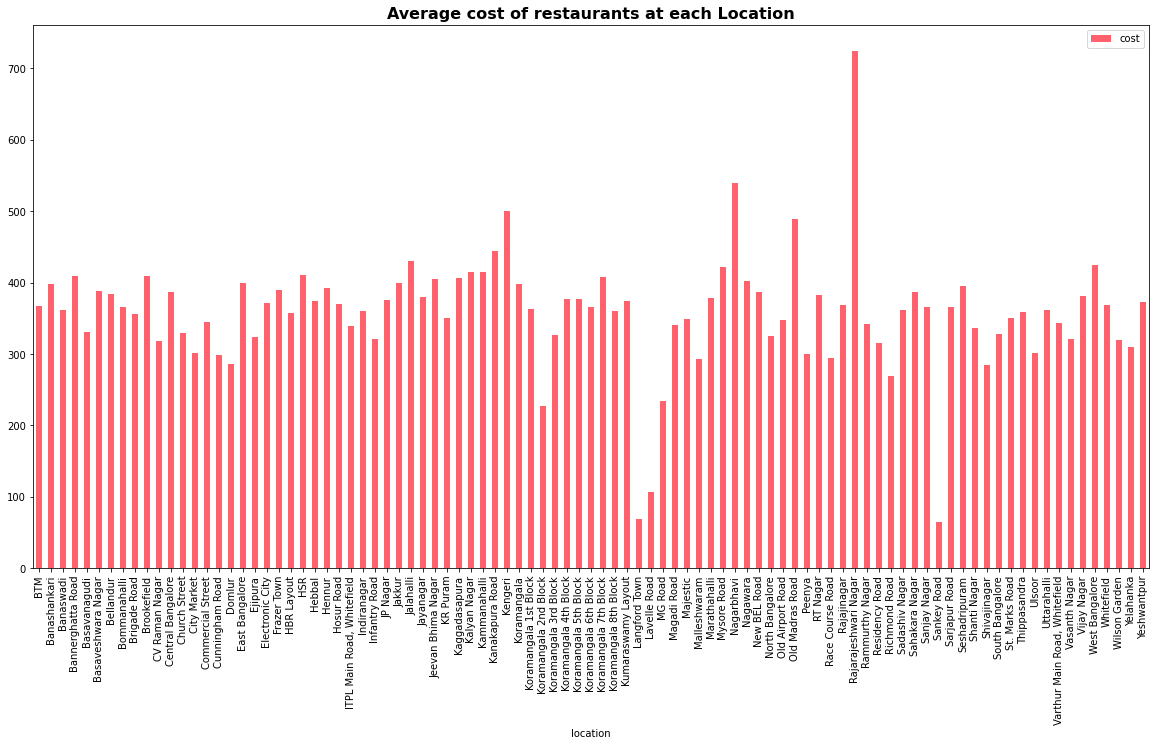

In [22]:
# Average cost of restaurants at each loaction

a = df.groupby('location').agg({'cost':'mean'})

plt.rcParams["figure.figsize"] = (20,10)
a.plot(kind='bar', color='#FF616D')
plt.title('Average cost of restaurants at each Location', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [23]:
a.sort_values("cost", ascending=False)

,cost
location,
Rajarajeshwari Nagar,725.000000
Nagarbhavi,538.888889
Kengeri,500.000000
Old Madras Road,488.636364
Kanakapura Road,444.815789
...,...
MG Road,234.076640
Koramangala 2nd Block,227.207216
Lavelle Road,107.385127


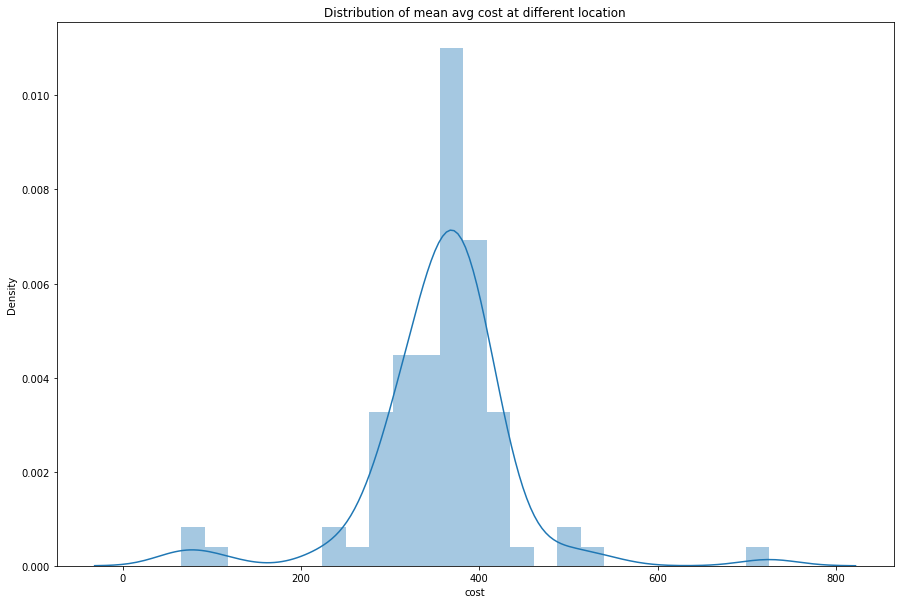

In [24]:
plt.figure(figsize=(15,10))
plt.title("Distribution of mean avg cost at different location")
sns.distplot(a["cost"]);

Observation: Most of the restaurants have cost between Rs. 400 and Rs. Depending on our budget one can select the location.



In [25]:
df["votes"] 

0        775
1        787
2        918
3         88
4        166
        ... 
49435     27
49436      0
49437      0
49438    236
49439     13
Name: votes, Length: 49440, dtype: int64

**What is the relation between vote and ratings ??**

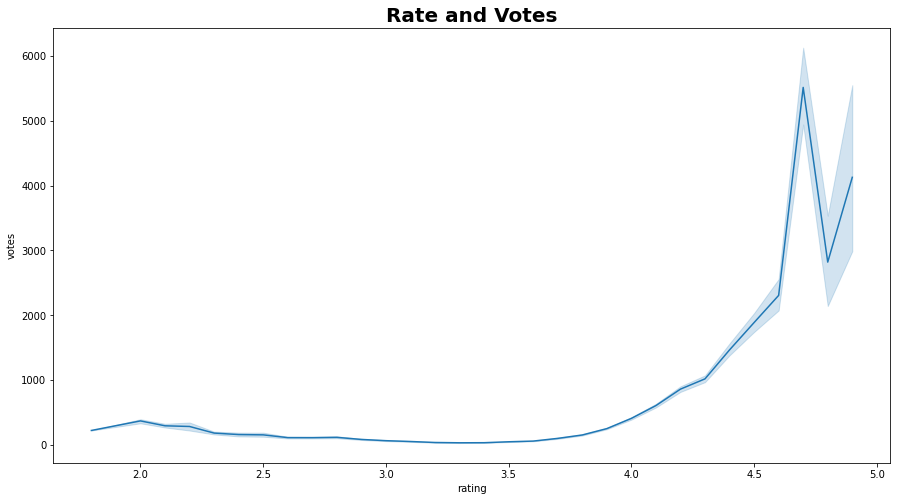

In [26]:
# Relation of rate and votes

plt.figure(figsize=(15,8))
sns.lineplot(x='rating', y='votes', data=df)
plt.title('Rate and Votes', fontsize=20, fontweight='bold')
plt.show()

Observation:- The line plot indicates that for ratings greater than 4.0 the number of votes is more and for less ratings the number of votes are less. Hence, restaurants with high rating also have high votes.